# Nurse Scheduling

Author: Chi Tang

1. Each day is divided into 2 separate shifts of 12 hours (day/night).

2. There are a number of required nurses for each of them. 

3. A nurse is off on a specific day if no shift is assigned or if the nurse has requested a PTO on that specific day. 

4. The planning length is 4 weeks (28 days). 

5. Each nurse should work either 12, 24 or 36 hours hours per week.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pandas.tools.plotting import table
import seaborn
import json, re, os

%matplotlib inline

## Systematically label each working time interval

* The time interval can be adjusted easily.

In [398]:
time_schedule = []
col = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri','Sat','Sun']   # Working time from Monday to Sunday 8am to 6pm
index = [
        '8:00 - 10:00',
        '10:00 - 12:00',
        '12:00 - 14:00',
        '14:00 - 16:00',
        '16:00 - 18:00'
        ]

for _ in range(1,6):
    day_str = []
    for day in col:
        day_str.append(day + '_' + str(_))
    time_schedule.append(day_str)

time_intervals = pd.DataFrame(time_schedule, columns=col, index=index)

print time_intervals

                 Mon    Tue    Wed    Thur    Fri    Sat    Sun
8:00 - 10:00   Mon_1  Tue_1  Wed_1  Thur_1  Fri_1  Sat_1  Sun_1
10:00 - 12:00  Mon_2  Tue_2  Wed_2  Thur_2  Fri_2  Sat_2  Sun_2
12:00 - 14:00  Mon_3  Tue_3  Wed_3  Thur_3  Fri_3  Sat_3  Sun_3
14:00 - 16:00  Mon_4  Tue_4  Wed_4  Thur_4  Fri_4  Sat_4  Sun_4
16:00 - 18:00  Mon_5  Tue_5  Wed_5  Thur_5  Fri_5  Sat_5  Sun_5


In [399]:
# Collect all the labelled time intervals

timeslot_collection = np.ravel(time_schedule)
print timeslot_collection

['Mon_1' 'Tue_1' 'Wed_1' 'Thur_1' 'Fri_1' 'Sat_1' 'Sun_1' 'Mon_2' 'Tue_2'
 'Wed_2' 'Thur_2' 'Fri_2' 'Sat_2' 'Sun_2' 'Mon_3' 'Tue_3' 'Wed_3' 'Thur_3'
 'Fri_3' 'Sat_3' 'Sun_3' 'Mon_4' 'Tue_4' 'Wed_4' 'Thur_4' 'Fri_4' 'Sat_4'
 'Sun_4' 'Mon_5' 'Tue_5' 'Wed_5' 'Thur_5' 'Fri_5' 'Sat_5' 'Sun_5']


## Randomly generate a nurse dataset:

* Each nurse will have their own available time schedule. They may not be able to work on some time intervals during the week.
* Each nurse maximum hours per week can be adjusted based on real situations.

In [400]:
NUM_NURSE = 10
NUM_HOSPiTAL = 1
nurse_name = []

for _ in range(1,NUM_NURSE + 1):
    nurse_name.append('nurse_' + str(_))
print "There are %d nurses to be arranged in %d hospital \n"%(NUM_NURSE, NUM_HOSPiTAL)
print nurse_name

There are 10 nurses to be arranged in 1 hospital 

['nurse_1', 'nurse_2', 'nurse_3', 'nurse_4', 'nurse_5', 'nurse_6', 'nurse_7', 'nurse_8', 'nurse_9', 'nurse_10']


## Create nurse schedule and save it in a hashmap.

In [401]:
nurse_own_schedule = {}

for nurse in nurse_name:
    df_nurse = time_intervals.copy()
    for day in range(7):
        rand_time = np.random.randint(1,4)
        for i in np.random.randint(0,5,rand_time):
            df_nurse.iloc[i][day] = 'Not_available'
    nurse_own_schedule[nurse] = df_nurse

## Save the data of nurse

In [402]:
if not os.path.isdir('utils/'):
    os.mkdir('utils/')
for key in nurse_own_schedule.keys():
    nurse_own_schedule[key].to_csv('utils/'+ key + 'available_time.csv')
    print 'schedule of  ' + str(key)

schedule of  nurse_1
schedule of  nurse_3
schedule of  nurse_2
schedule of  nurse_5
schedule of  nurse_4
schedule of  nurse_7
schedule of  nurse_6
schedule of  nurse_9
schedule of  nurse_8
schedule of  nurse_10


## Define a plot table function to visualize the tables

In [403]:
def plot_table(printContext = True, saveFig = False, **kwargs):
     
    for key, cells in kwargs.iteritems():
        
        if printContext == True:
            print "The schedule of {} is:".format(key)


        colors = cells.applymap(lambda x: 'lightgray' if x== 'Not_available' else 'lightcoral') 

        fig = plt.figure(figsize=(8,4))

        ax = plt.subplot(2, 1, 1, frame_on = True)  # no visible frame
        #ax.xaxis.set_visible(False)  # hide the x axis
        #ax.yaxis.set_visible(False)
        ax.axis('off')

        tb1 = table(ax,cells,
                    loc='center',
                    cellLoc='center',
                    cellColours=colors.as_matrix(),
                    fontsize=14
              )

        plt.tight_layout()
       
        if saveFig == True:
            if not os.path.isdir('figs/'):
                os.mkdir('figs/')
            plt.savefig('figs/'+key+'.png', bbox_inches='tight', dpi = 150)
        
        # refresh the plot
        plt.show()

The schedule of nurse_1 is:


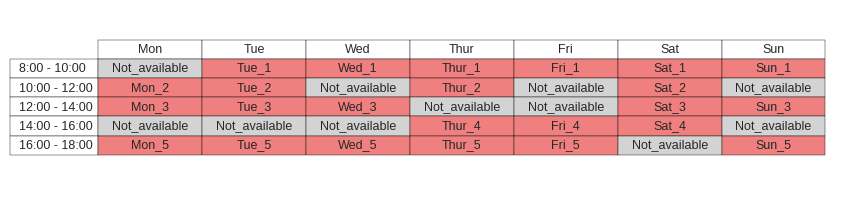

The schedule of nurse_3 is:


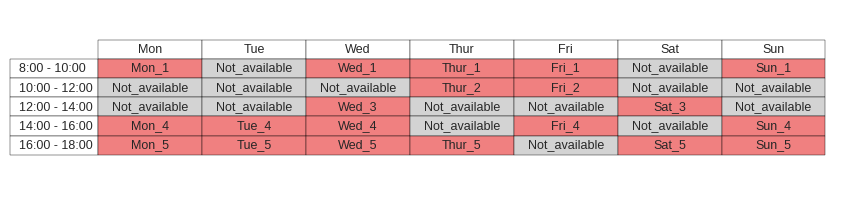

The schedule of nurse_2 is:


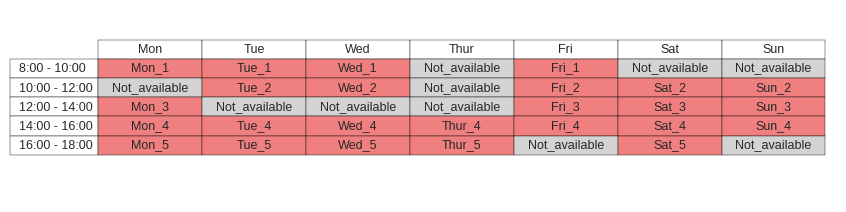

The schedule of nurse_5 is:


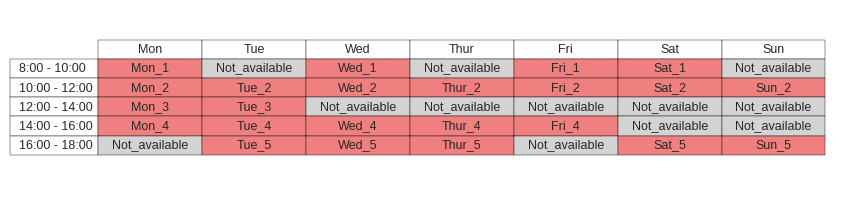

The schedule of nurse_4 is:


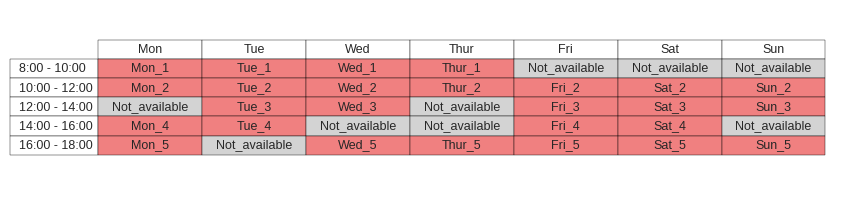

The schedule of nurse_7 is:


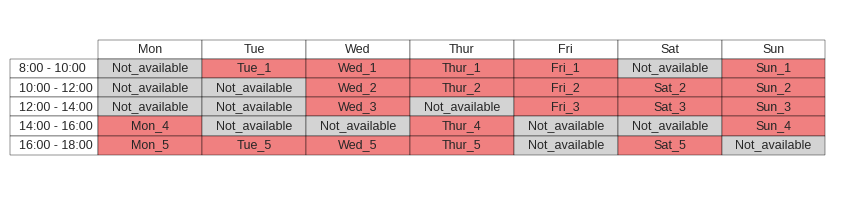

The schedule of nurse_6 is:


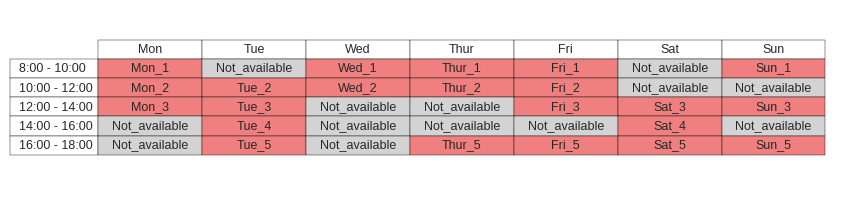

The schedule of nurse_9 is:


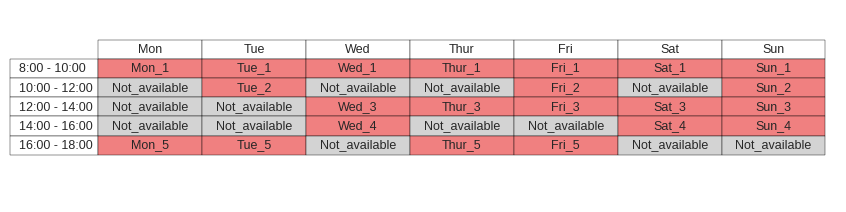

The schedule of nurse_8 is:


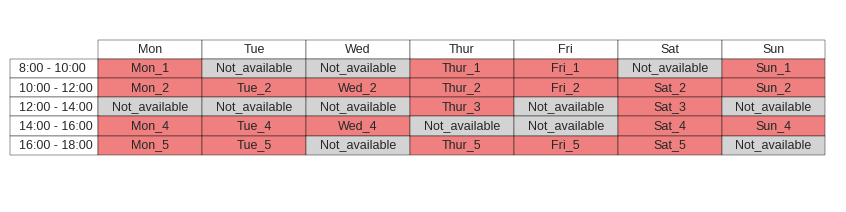

The schedule of nurse_10 is:


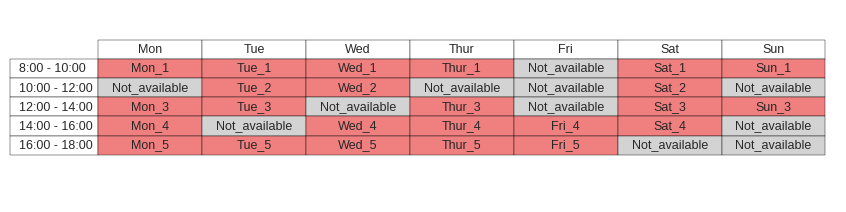

In [404]:
plot_table(saveFig=True, **nurse_own_schedule)

## Now make an arrangement:

* Schedule a nurse on on each time interval. 
* Count the total time of each nurse. Make sure the total time of the arranged nurse is below the maximum working hours.

The arrangement is: 


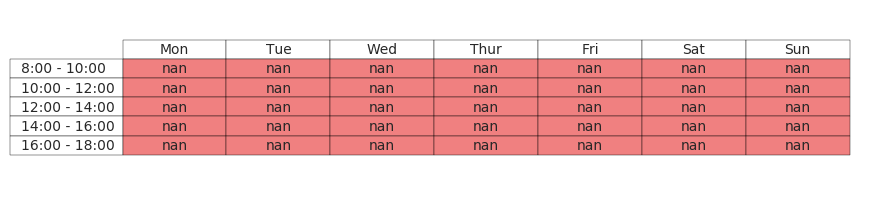

In [405]:
# create an empty dataset.

arrangement = pd.DataFrame(data = None, index = time_intervals.index, columns= time_intervals.columns)
print 'The arrangement is: '
plot_table(printContext=False,**{'arrangement': arrangement})

## create a hashmap to store all the available nurses on each time slot

## save the information 

In [406]:
available_nurse_map = {key: [] for key in timeslot_collection}
#print available_nurse_map

for name in nurse_name:
    
    nurse_arr = np.ravel(nurse_own_schedule[name], order = 'F') 
    nurse_arr = np.delete(nurse_arr, np.where(nurse_arr == 'Not_available'))
    for i in nurse_arr:
        available_nurse_map[i].append(name)

print "For example, on Monday from 8:00 to 10:00, the available nurses are: "
print available_nurse_map['Mon_1']

if not os.path.isdir('utils/'):
    os.mkdir('utils/')
    
with open("utils/available_nurse_map.txt",'w') as f:
    json.dump(available_nurse_map, f)

For example, on Monday from 8:00 to 10:00, the available nurses are: 
['nurse_2', 'nurse_3', 'nurse_4', 'nurse_5', 'nurse_6', 'nurse_8', 'nurse_9', 'nurse_10']


## Start arrangement

In [407]:
# Initialize the hours of each nurse to zero
nurse_hours = {key: 0 for key in nurse_name}
MAX_HOURS = 10 # the maximum working hours is set to 10 hours here.

available_nurse_map_copy = available_nurse_map.copy()

for each_time in timeslot_collection:   
    # parse the each_time into index and column number in the data frame
    col, idx = each_time[:each_time.find('_')], int(each_time[each_time.find('_')+1:])
    #print idx,col
    
    while True:
        if not available_nurse_map_copy[each_time]: 
            arrangement[col][idx-1] # pay attention to the idx here.
            break
        else:
            select_nurse = np.random.choice(available_nurse_map_copy[each_time])
             # if the working hours of selected nurse is over 10, then drop the selection in the list.
            if nurse_hours[select_nurse] >= 10: 
                available_nurse_map_copy[each_time].remove(select_nurse)
            #otherwise, arrange the selected nurse to work on this time interval.
            # make sure to update their work time.
            else:
                nurse_hours[select_nurse] += 2  # The working hours for each time slot.
                arrangement[col][idx - 1] = select_nurse
                break
                
print "The arrangement this week is: "

arrangement

The arrangement this week is: 


,Mon,Tue,Wed,Thur,Fri,Sat,Sun
8:00 - 10:00,nurse_8,nurse_2,nurse_7,nurse_9,nurse_6,nurse_10,nurse_3
10:00 - 12:00,nurse_1,nurse_1,nurse_5,nurse_8,nurse_7,nurse_7,nurse_4
12:00 - 14:00,nurse_5,nurse_6,nurse_1,nurse_9,nurse_4,nurse_4,nurse_4
14:00 - 16:00,nurse_8,nurse_2,nurse_3,nurse_10,nurse_1,nurse_4,nurse_3
16:00 - 18:00,nurse_1,nurse_2,nurse_10,nurse_3,nurse_9,nurse_8,nurse_5


## define the visualization function and plot the schedule of this week.

In [408]:
def plot_arrangement(data = arrangement, saveFig = False):

    print "The arrangement of the nurses in this week is:"


    color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                   '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',              
                  '#bcbd22', '#17becf']

    colors = data.applymap(lambda x: color_list[int(x[int(x.find('_'))+1:])-1])  # label each nurse to the specific color

    fig = plt.figure(figsize=(8,4))

    ax = plt.subplot(2, 1, 1, frame_on = True)  # no visible frame
    #ax.xaxis.set_visible(False)  # hide the x axis
    #ax.yaxis.set_visible(False)
    ax.axis('off')

    tb1 = table(ax,data,
                loc='center',
                cellLoc='center',
                cellColours=colors.as_matrix(),
                fontsize=14
          )

    plt.tight_layout()

    if saveFig == True:
        if not os.path.isdir('figs/'):
            os.mkdir('figs/')
        plt.savefig('figs/arrangement.png', bbox_inches='tight', dpi = 150)

    # refresh the plot
    plt.show()

The arrangement of the nurses in this week is:


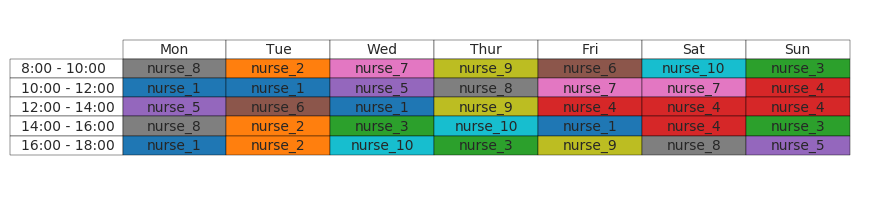

In [409]:
plot_arrangement(saveFig=True)